<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left"/>
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.976 · Anàlisi de grafs i xarxes socials</p>
<p style="margin: 0; text-align:right;">Màster universitari de Ciència de Dades (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Introducció a NetworkX

[NetworkX](https://networkx.org/) és un dels paquets de Python més populars per a la creació, manipulació i estudi de l'estructura de les xarxes complexes en general (i les xarxes socials en particular).

Al nivell més bàsic, una xarxa es compon de dos elements

* Els subjectes representats, anomenats *nodes* (**nodes**).
* Les relacions entre ells, anomenades  *arestes* (**edges**).

## Primeres passes

Importar **networkx** i crear un graf *buit*.

In [1]:
import networkx as nx
G = nx.Graph()

Un **Graph** o *graf* és un conjunt de nodes relacionats per parells (mitjançant les seves arestes, enllaços o relacions). A NetworkX, els nodes es poden formar a partir de gairebé qualsevol objecte:

- Cadenes de text (strings).
- Imatges.
- Objectes XML.
- Altres grafs.
- Etc.

Els grafs es poden construir de diverses maneres. 

## NODES (NODES)

Començarem veient com s'incorporen nodes de manera simple.

In [2]:
G.clear() #Reiniciamos G.

# Per exemple, d'un en un

G.add_node(1)
print("1. El graf G té els nodes: " + str(list(G.nodes())))

# O amb una llista

G.add_nodes_from([1,2,3,4,5])
print("2. El graf G té els nodes: " + str(list(G.nodes())))

# Observeu que s'ha intentat tornar a inserir el node 1 però ni s'ha duplicat ni ha retornat error, simplement s'ha ignorat

1. El graf G té els nodes: [1]
2. El graf G té els nodes: [1, 2, 3, 4, 5]


## ARISTAS (EDGES)

Les arestes funcionen de manera molt similar.

In [3]:
# Afegim una aresta sense atributs. Ara com ara, és un Graph() i, per tant, NO és direccional.

G.add_edge(1, 2) # Crea un enllaç entre 1 i 2.
print("1. El graf G té les arestes: " + str(list(G.edges())))

# També podem afegir una llista d'arestes.

G.add_edges_from([(1, 2), (1, 3)])
print("2. El graf G té les arestes: " + str(list(G.edges())))

# De nou, les arestes ja existents no es dupliquen ni donen error; s'ignoren.  

1. El graf G té les arestes: [(1, 2)]
2. El graf G té les arestes: [(1, 2), (1, 3)]


Però, què passa si afegim una aresta entre nodes que no existeixen en el graf? Comprovem-ho.

In [4]:
print("Nodes inicials: " + str(list(G.nodes())))
print("Arestes inicials: " + str(list(G.edges())))

#Afegim una aresta entre 1 (que sí que hi és) i 6 (que no) i una altra entre 7 i 8 (cap es troba entre els nodes inicials).

G.add_edges_from([(1, 6), (7, 8)])

print("Nodes finals: " + str(list(G.nodes())))
print("Arestes finals: " + str(list(G.edges())))

Nodes inicials: [1, 2, 3, 4, 5]
Arestes inicials: [(1, 2), (1, 3)]
Nodes finals: [1, 2, 3, 4, 5, 6, 7, 8]
Arestes finals: [(1, 2), (1, 3), (1, 6), (7, 8)]


Així, comprovem que afegir arestes també crea els nodes necessaris. Cal ser cautelós amb la creació, ja que es poden produir generacions no desitjades en intentar establir un vincle entre dos nodes referenciats incorrectament sense adonar-nos-en.

### Eliminar nodes o aristes

Per a eliminar nodes o arestes hi ha les funcions inverses a les d'afegir. Substitueixen *add* per *remove*. 

In [5]:
print("Nodes: " + str(list(G.nodes())))
print("Arestes: " + str(list(G.edges())))

# Afegim node 9 i arestes (10,11) i (8,9)
G.add_node(9)
G.add_edges_from([(10, 11), (8, 9)])

print("\nAfegim node 9 i dues arestes entre 10 i 11 (que es creen) i 8 i 9 (que ja existeixen)")
print("Nodes: " + str(list(G.nodes())))
print("Arestes: " + str(list(G.edges())))

# Eliminem node 10 i aresta (8,9).
G.remove_node(10)
G.remove_edge(8, 9)

print("\nEliminem node 10 i aresta (8,9)")
print("Nodes: " + str(list(G.nodes())))
print("Arestes: " + str(list(G.edges())))

print("\nEn eliminar el node 10, ha eliminat automàticament l'aresta 10,11, però el node 11 continua estant aquí.")
print("Eliminar l'aresta 8, 9 no afecta els nodes, només el seu enllaç.")

# Eliminamos nodos 9 y 11 que han quedado sin tocar.
G.remove_nodes_from([9,11])

print("\nTorna a l'estat inicial")
print("Nodes: " + str(list(G.nodes())))
print("Arestes: " + str(list(G.edges())))

Nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Arestes: [(1, 2), (1, 3), (1, 6), (7, 8)]

Afegim node 9 i dues arestes entre 10 i 11 (que es creen) i 8 i 9 (que ja existeixen)
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Arestes: [(1, 2), (1, 3), (1, 6), (7, 8), (8, 9), (10, 11)]

Eliminem node 10 i aresta (8,9)
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
Arestes: [(1, 2), (1, 3), (1, 6), (7, 8)]

En eliminar el node 10, ha eliminat automàticament l'aresta 10,11, però el node 11 continua estant aquí.
Eliminar l'aresta 8, 9 no afecta els nodes, només el seu enllaç.

Torna a l'estat inicial
Nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Arestes: [(1, 2), (1, 3), (1, 6), (7, 8)]


## GENERADORS

Entrarem més endavant en aquest cas, però ara com ara només cal dir que NetworkX conté moltes funcions dedicades a generar automàticament diversos tipus de grafs comuns o habituals d'estudi. Per exemple, el [graf de Petersen](https://en.wikipedia.org/wiki/Petersen_graph "Petersen Graph en Wikipedia.org"):

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Petersen1_tiny.svg/200px-Petersen1_tiny.svg.png "Petersen Graph")

In [6]:
# Generar el graf de Petersen.
petersen = nx.petersen_graph()

print("El graf de Petersen té per nodes: " + str(list(petersen.nodes())))
print("El graf de Petersen té per arestes: " + str(list(petersen.edges())))

# Altres generadors admeten paràmetres. Per exemple, generar un graf complet de mida K. Provem per a K = 4.

K_4 = nx.complete_graph(4)

print("El graf complet de K=4 té per nodes: " + str(list(K_4.nodes())))
print("El graf complet de K=4 té per arestes: " + str(list(K_4.edges())))

El graf de Petersen té per nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
El graf de Petersen té per arestes: [(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]
El graf complet de K=4 té per nodes: [0, 1, 2, 3]
El graf complet de K=4 té per arestes: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


No hi entrarem més detalladament ara, però els dibuixarem amb matplotlib per a visualitzar-los.

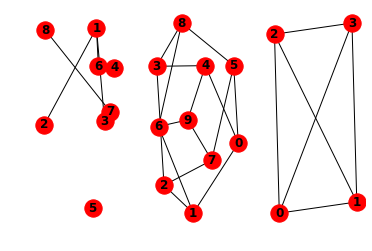

In [8]:
import matplotlib.pyplot as plt

# Dibuixarem, d'esquerra a dreta, G (tal com va quedar en l'últim pas), Petersen i K_4.
plt.subplot(131)
nx.draw_random(G, with_labels=True, font_weight='bold')
plt.subplot(132)
nx.draw(petersen, with_labels=True, font_weight='bold')
plt.subplot(133)
nx.draw(K_4, with_labels=True, font_weight='bold')
plt.show()

Sembla que el Petersen (al mig) està una mica atropellat, oi? En realitat, cal tenir en compte una cosa important: un graf no té una forma definida, de la mateixa manera que les seves arestes no tenen una dimensió de «distancia». Així, encara que sembli molt diferent a la imatge neta de l'apartat anterior, és en realitat **exactamente** el mateix graf. Però sí, l'anterior era més clar i més bonic; més endavant veurem com aconseguir, en la mesura del possible, que els grafs siguin *bonics*.


## PROPIETATS BÀSIQUES

Una vegada representat el graf, és el moment de treballar-hi. Comencem veient les operacions bàsiques que es poden fer sobre els seus components per a comprovar-ne les propietats

- G.nodes(): Per a obtenir la llista de nodes.
- G.edges(): Per a obtenir la llista d'arestes.
- G.adj\[NODO\]: Per a obtenir la llista de nodes adjacents (*veïns*) a NODE.
- G.degree\[NODO\]: Per a obtenir el grau de NODE (és a dir, el nombre d'arestes que li arriben).


In [9]:
# Utilitzem G com a referència de nou. Es pot veure el graf dibuixat per a comprovar els resultats.
print("Nodes: " + str(list(G.nodes())))
print("Arestes: " + str(list(G.edges())))
print("Nodes veïns d'1: " + str(list(G.adj[1])))
print("Grau del node 1: " + str(G.degree[1]))

Nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Arestes: [(1, 2), (1, 3), (1, 6), (7, 8)]
Nodes veïns d'1: [2, 3, 6]
Grau del node 1: 3


**NOTA:** Cal tenir en compte que els mètodes que llisten nodes, arestes i adjacents han canviat a NetworkX 2 respecte a la versió 1.x anterior. No entrarem en detalls, encara que es poden consultar a l'[anunci oficial](https://networkx.github.io/documentation/stable/release/release_2.0.html "NetworkX Release 2.0"). 

Bàsicament, les funcions del tipus *nodes()* retornaven una llista d'objectes i els *nodes_iter()*, un iterador. Ara, els primers retornen una vista (iterable) de només lectura *NodeView*, la qual cosa ha substituït la segona funció, que ja no és necessària. Per a treure la llista de la vista només cal usar la funció de Python *list()*, com hem fet fins ara. Comprovem-ne la diferència.

In [10]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8))

In [11]:
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8]

In [12]:
# NodeView es iterable
for node in G.nodes():
    print(node)

1
2
3
4
5
6
7
8


## ATRIBUTS

Fins ara, els nodes i les arestes creades estan buits. Representen una relació però no tenen atributs. De vegades, interessa que sigui així (per exemple, la relació "viu amb" no necessita atribut), però també hi ha casos en què ens interessa mantenir més informació (per exemple, si la persona representada en un node és home o dona, o el nombre de vegades que una persona ha vist a una altra durant un cert període de temps).

Com s'afegeixen els atributs?

### Afegir atributs a nodes

In [13]:
# Directament en la creació
G.add_node(1, sexe='dona')
G.add_nodes_from([3,6], sexe='home')

# Creant l'atribut i afegint-lo (o modificant-lo)
G.nodes[3]['sexe'] = 'dona'
G.nodes[8]['edat'] = 25
G.nodes[8]['sexe'] = 'home'

# Així ho veiem ordenat, cada node amb els seus atributs.
for node in G.nodes.data():
    print(node)

(1, {'sexe': 'dona'})
(2, {})
(3, {'sexe': 'dona'})
(4, {})
(5, {})
(6, {'sexe': 'home'})
(7, {})
(8, {'edat': 25, 'sexe': 'home'})


### Afegir atributs a arestes

Un cas molt típic és el pes, *weight*. Només cal tenir en compte que aquest atribut en concret és una mica especial i hauria de ser numèric, perquè molts algorismes l’usen per als seus càlculs (recorreguts mínims, per exemple). Per a la resta, la mateixa llibertat i funcionalitat que amb els nodes.

In [14]:
#Directament en la creació
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='blue')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

#Creant l'atribut i afegint-lo (o modificant-lo).
G[1][6]['weight'] = 3.0
G.edges[3, 4]['weight'] = 4.2

for edge in G.edges.data():
    print(edge)

(1, 2, {'weight': 4.7, 'color': 'blue'})
(1, 3, {})
(1, 6, {'weight': 3.0})
(2, 3, {'weight': 8})
(3, 4, {'color': 'blue', 'weight': 4.2})
(4, 5, {'color': 'blue'})
(7, 8, {})


Un cas que pot cridar l'atenció en l'exemple anterior és G[1][6]. Només cal tenir en compte que:
- G\[1\] és equivalent a G.adj\[1\], vist anteriorment.
- G\[1\], per tant, retorna els adjacents a 1, que són 2, 3 y 6. 
- G\[1\]\[6\] es refereix al node 6 adjacent a 1, i és una altra forma de referir-se a l'aresta (1,6).
- Tant G\[1\]\[6\] com G.edges\[1, 6\] retornen directament el diccionari d'atributs de l'aresta.

Potser és poc intuïtiu, però executar G\[1\]\[5\], per exemple, donarà error, perquè no hi ha vincle entre 1 i 5.

In [15]:
print(G[1] == G.adj[1])
print(G[1][6] == G.edges[1, 6])

True
True


## GRAFS DIRIGITS

També és important esmentar els grafs dirigits. S'ha vist que els grafs sense direcció responen a relacions que són obligatòriament recíproques (per exemple, si l’Ana viu amb el José, el José viu amb l’Ana). Però moltes relacions no ho són, sinó que tenen direcció. Per exemple, l'amistat. Que l’Ana consideri que el Jose és amic seu no significa que el Jose consideri l’Ana com amiga seva *per se*. Al seu torn, hi ha algorismes que només funcionen en grafs dirigits (però també n’hi ha d’altres que no estan ben definits sobre grafs dirigits, així que hi ha la possibilitat de transformar-los, tot i que perdent el seu significat original).

Les seves funcionalitats bàsiques són molt semblants a les de Graph()

In [16]:
# Crear un graf dirigit
DG = nx.DiGraph()

# Afegir arestes/nodes amb pesos.
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

# Mostrar el GRAU (però aquí es té en compte el pes de cada aresta que passa pel node).
print(DG.degree(1, weight='weight'))

# Les dues formes d'obtenir els adjacents 
print(list(DG.adj[1]))
print(list(DG.neighbors(1)))


1.25
[2]
[2]


Però, un moment, si existeixen les arestes (1,2) i (3,1), per què no apareix 3 com a veí d'1 a DG.adj\[1\]? 

La resposta es troba en les funcions pròpies de DiGraph, com *in_degree()* y *out_degree()* (arestes entrants i sortints) o *predecessors()* y *successors()* per a obtenir els seus adjacents direccionals. DG.adj és equivalent, per a DiGraph, als successors

Així, només retornarà els nodes als quals s'arribi des d'1, no els que arribin a aquest.

Vegem les funcions pròpies en acció.

In [17]:
print(DG.in_degree(1)) # Grado ENTRANTE
print(DG.in_degree(1, weight='weight')) # Suma de pesos ENTRANTES
print(DG.out_degree(1, weight='weight')) # Suma de pesos SALIENTES
print(list(DG.predecessors(1))) # Lista de PREDECESORES
print(list(DG.successors(1))) # Lista de SUCESORES

1
0.75
0.5
[3]
[2]


## MULTIGRAFS

Un cas particular (i habitualment menys útil, tret per a aplicacions específiques) és el multigraf, al qual NetworkX també dona cert suport. Pocs algorismes estan definits per a ells, però bàsicament són una extensió del graf o del graf dirigit en la qual és possible tenir definides dues arestes entre el mateix parell de nodes

In [18]:
# Creació
MG = nx.MultiGraph() # O MultiDiGraph() para direccionales.

# Construcció
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

# Graus per node
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

Observeu que el grau d'1 és la suma de dues arestes que van al mateix node, 2, que el grau de 2 és la suma de les dues arestes que li arriben d'1 i de la que va cap a 3, mentre que el node 3 només rep una aresta de 2.